## Data Preparation

In [1]:
# Import necessary libraries and make necessary arrangements
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.filterwarnings('ignore')

In [8]:
# Import data
df_train=pd.read_csv("train.csv",index_col=0)
df_test =pd.read_csv("test.csv",index_col=0)
df_transactions = pd.read_csv("transactions.csv")
df_stores = pd.read_csv("stores.csv")
df_holidays = pd.read_csv("holidays_events.csv")
df_oil = pd.read_csv("oil.csv")

In [9]:
df_all = df_train.append(df_test)
df_all = df_all.loc[(df_all.store_nbr ==10) & (df_all["family"]=='GROCERY I')]
df_all = df_all.merge(df_stores,left_on="store_nbr",right_on="store_nbr",how="left")
df_holidays = df_holidays.rename(columns = {"type":"Holiday_type"})
df_all = df_all.merge(df_holidays,left_on="date",right_on="date",how="left")
df_all = df_all.merge(df_transactions,left_on=["date","store_nbr"],right_on=["date","store_nbr"],how="left")
df_all = df_all.merge(df_oil,left_on="date",right_on="date",how="left")
df_all = df_all.replace([","," "],"_",regex=True)
df_all = df_all.rename(columns = {"date":"Date"})
df_all["Date"] = df_all["Date"].astype("datetime64")

In [10]:
df_all["family"].unique()

array(['GROCERY_I'], dtype=object)

## Decompose

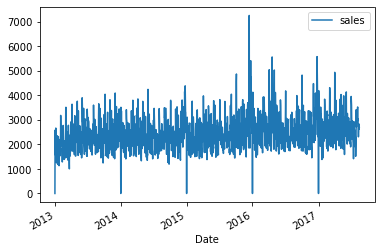

In [12]:
df_decompo = df_all[["Date","sales"]][:-16]
df_decompo = df_decompo.set_index("Date")
df_decompo.plot()
plt.show()

## STL decompose

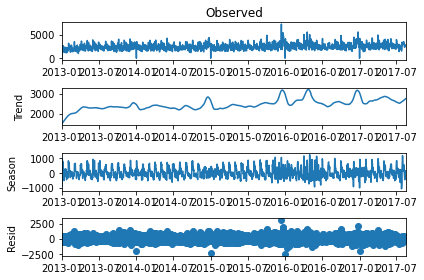

In [58]:
# STL
from statsmodels.tsa.seasonal import STL

stl = STL(df_decompo,period=30)
res = stl.fit()
fig = res.plot()

## Seansonal decompose

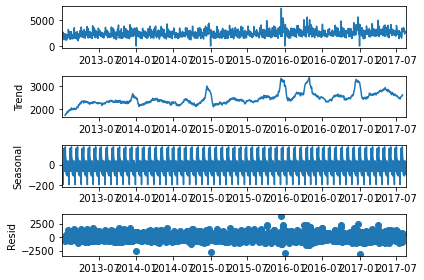

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
SD = seasonal_decompose(df_decompo[1:],period=30,model='additive')
fig_SD = SD.plot()